<a href="https://colab.research.google.com/github/Ming-sean-Tsai/tibaml1017/blob/main/%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%9801.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

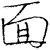

(50, 50, 3)


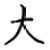

(50, 50, 3)


In [47]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image


m1 = cv2.imread('A100.jpg', 1)

copy = m1.copy()

m1_g = cv2.cvtColor(m1, cv2.COLOR_BGR2GRAY) # 手寫字轉灰階

ret, m1_new = cv2.threshold(m1_g, 127, 255, cv2.THRESH_BINARY) # 手寫字轉黑底白字 

erode = cv2.erode(copy, np.ones((30, 30))) #抓字

gray = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY) #轉灰階

blur = cv2.GaussianBlur(gray,(5,5),0)   #模糊化


canny = cv2.Canny(blur, 70, 210)

th, canny = cv2.threshold(canny, 10, 255, cv2.THRESH_BINARY)

morph = cv2.morphologyEx(canny, cv2.MORPH_GRADIENT, np.ones((10, 10))) 
p, t = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(p)== 1:
    x, y, w, h = cv2.boundingRect(p[0]) 
    cv2.rectangle(m1_new, (x,y), (x+w, y+h), (255, 255, 255), 2) #框線改白色
    capture_img = m1_new[y : y + h, x : x + w] #框起來的地方
    
    resize_capture = cv2.resize(capture_img, (50, 50), interpolation=cv2.INTER_AREA)

    cv2.imwrite("resize_capture.png", resize_capture) #存成 50*50 的手寫字
    resize_capture = cv2.imread("resize_capture.png", 1)
    # 手寫辨識
    y_dict = {0:"者",1:"我",2:"國",3:"來",4:"面",5:"過",6:"為",7:"大",8:"成",9:"民"}
    m = cv2.ml.KNearest_load('tch_knn.xml')   # 載入模型
    img = cv2.imread("resize_capture.png", 0)
    ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    img = cv2.resize(img,(50, 50))
    img = img.astype(np.float32)    # 轉換格式
    img = img.reshape(-1)          # 打散成一維陣列資料，轉換成辨識使用的格式
    img = img.reshape(1,-1)
    img = img/255

    img_pre = m.predict(img)          # 進行辨識

    text = y_dict[int(img_pre[1][0][0])]        # 取得辨識結果


    compare_word = np.full((50, 50, 3), (255, 255, 255), np.uint8) 
    compare_word = Image.fromarray(compare_word)
    ImageDraw.Draw(compare_word).text((0,0),
                (text), #要換成練習的字
                (0, 0, 0),
                ImageFont.truetype("ThePeakFontBeta_V0_101.ttf", 50)  #要上傳字體
    )
    compare_word = np.array(compare_word)
    

     

    copy = compare_word.copy()

    # erode = cv2.erode(copy, np.ones((30, 30)))  

    # blur = cv2.GaussianBlur(erode,(5,5),0) 

    canny = cv2.Canny(copy, 70, 210)

    th, canny = cv2.threshold(canny, 10, 255, cv2.THRESH_BINARY)

    morph = cv2.morphologyEx(canny, cv2.MORPH_GRADIENT, np.ones((10, 10))) 
    p, t = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(p[0]) 
    cv2.rectangle(compare_word, (x,y), (x+w, y+h), (255, 255, 255), 2)  #框線改白色
    compare2_img = compare_word[y : y + h, x : x + w] #要再resize

    

    resize_compare = cv2.resize(compare2_img, (50, 50), interpolation=cv2.INTER_AREA)

    cv2_imshow(resize_capture)
    print(resize_capture.shape)
    cv2_imshow(resize_compare)
    print(resize_compare.shape) # 最後請用resize_capture.png 跟resize_compare.png 比對分數

else:
  print("請靠近文字再拍攝一次")

